<a href="https://colab.research.google.com/github/Nelson-iitp/2121CS07_CS575/blob/main/CS575_MidSem/2121CS07_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stmod
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller, kpss
#nos_steps = 101 # steps indexed 1 to nos_steps-1 (t=0 is ignored)
fgs = (15,6)
fgs2 = (20,15)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question

For each of the following, state if it is a stationary process. If so, give the mean and autocovariance
Functions. Where   {et} is i.i.d. N(0,1). Generate n = 100 observations of the time series.  Plot the time series ACF and PACF for each of the cases
Here, {et} is i.i.d. N(0,1).

(a) Yt = et −et−3
(b) Yt = Yt-1+0.9 Yt-2 + et
(c) Yt = 0.7Yt-1+0.2 Yt-2 -0.1 Yt-3-0.3 Yt-4+ et
(d) Yt = t + et
(e) Yt = et
(f) Xt = etet−2


# Define ACF, PACF 


In [ ]:
def plotshowSM(Y, Lags, include_L0):
  fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,8))
  plot_acf(Y,lags=Lags,zero=include_L0,ax=ax1)
  plot_pacf(Y,lags=Lags,zero=include_L0,ax=ax2)
  plt.show()

def plotshow(Y, Lags):

  scatter_x = np.arange(0,Lags+1,1)
  #print('Lags/Scatter =', Lags,'/', len(scatter_x))
  #<----------------------------------------------------------

  # <<------------ calculate ACONVF -----------------------------
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
  # mean subtracted
  ACONVF = stmod.acovf(Y,
            demean= True,
            nlag=Lags
            )
  ACONVF1 = stmod.acovf(Y, 
            demean= False,
            nlag=Lags
            )
  #print('ACONVF = #',len(ACONVF))
  plt.figure('ACONVF',figsize=fgs)
  plt.title('Auto-Covariance')

  plt.scatter(scatter_x, ACONVF, color='tab:green')
  plt.plot(ACONVF, color='tab:green',label='De-meaned')
  plt.plot(ACONVF1, color='tab:pink',label='Mean Shifted')

  plt.hlines(0,0,Lags+1,color='tab:green',linewidth=0.7)
  plt.legend()
  plt.show()
  
  # <<------------ calculate ACF -----------------------------
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
  ACF,xACF = stmod.acf(Y,
            unbiased=False,
            nlags=Lags,
            alpha = 0.1 
            )
  PACF,xPACF = stmod.pacf(Y, 
            nlags=Lags,
            alpha = 0.1 
            )

  #print('ACF, a__ = #',len(ACF),len(xACF),len(scatter_x))
  #print('PACF, a__ = #',len(PACF),len(xPACF),len(scatter_x))

  #plt.figure('CF',figsize=fgs)
  #plt.title('ACF & PACF')
  #print(xACF.shape,xPACF.shape)
  #plt.scatter(xACF[:,0],xACF[:,1])
  #plt.scatter(xPACF[:,0],xPACF[:,1])
  #plt.show()
  #print(xACF)

  _fig,_ax = plt.subplots( 2,1, figsize=fgs2)

  _ax[0].set_ylim(-1.1,1.1)
  _ax[0].set_title('ACF')
  _ax[0].plot(ACF, color='tab:red', linewidth=0.3)
  _ax[0].scatter(scatter_x, ACF, color='tab:red',marker='.', label='ACF')
  #_ax[0].plot(xACF[:,0], color='black', linewidth=0.5)
  #_ax[0].plot(xACF[:,1], color='black', linewidth=0.5)
  _ax[0].bar(scatter_x,ACF,width=0.2, color='tab:red')
  _ax[0].hlines(0,0,Lags+1,color='tab:gray',linewidth=0.5)
  _ax[0].vlines(1,-1.1,1.1,color='tab:gray',linewidth=0.7)
  
  #_ax[0].legend()

  _ax[1].set_ylim(-1.1,1.1)
  _ax[1].set_title('PACF')
  _ax[1].plot(PACF, color='tab:blue', linewidth=0.3)
  _ax[1].scatter(scatter_x, PACF, color='tab:blue',marker='.', label='PACF')
  #_ax[1].plot(xPACF[:,0], color='black', linewidth=0.5)
  #_ax[1].plot(xPACF[:,1], color='black', linewidth=0.5)
  _ax[1].bar(scatter_x,PACF,width=0.2, color='tab:blue')
  _ax[1].hlines(0,0,Lags+1,color='tab:gray',linewidth=0.5)
  _ax[1].vlines(1,-1.1,1.1,color='tab:gray',linewidth=0.7)
  #_ax[1].legend()

  plt.show()
  
  # <<------------ calculate PACF -----------------------------
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

  return ACONVF, ACONVF1, ACF, PACF # aconvf mean subtracted first

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

def GenTS(fYt, nos_steps, start_step, Lags, e):
  # get the ~N(0,1) error terms
  
  mu = np.zeros(nos_steps)
  var = np.zeros(nos_steps)
  Y = np.zeros(nos_steps)

  #'init random data in Y(t) upto start_step
  e[0]=0
  #Y[0:start_step]=np.random.normal(loc=0,scale=1,size=start_step)
  # <<------------ Set initial vlaues-----------------------------
  #e[0:start_ste] = 0

  # <<------------ calculate Y(t) -----------------------------
  for t in range(start_step, nos_steps):  #<< --------- start at Y(t=3)
    Y[t] = fYt(Y,e,t)
    mu[t] = np.mean(Y[0:t+1])
    var[t] = np.var(Y[0:t+1])
    #print(Y[t])

  _Y = np.mean(Y)
  print('Mean of Data:',_Y)
 # <<------------ Plot Y(t) -----------------------------
  plt.figure('Y(t)',figsize=fgs)
  plt.title('Time-Series Data')

  plt.plot(Y, color='black', label='Y(t)')
  plt.plot(mu, color='tab:green', label='Mean')
  plt.plot(var, color='tab:red', label='Var')

  plt.hlines(0,0,nos_steps,color='black',linewidth=0.7)
  plt.hlines(_Y,0,nos_steps,color='tab:green',linestyle='dotted') #<<-------- MEAN
  plt.legend()
  plt.show()
  #print('LenY/nos_steps = #',len(Y), '/',nos_steps )

  #<----------------------------------------------------------
  #plotshowSM(Y,Lags,False)
  return Y, e, plotshow(Y, Lags)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Define ADF TEST

In [ ]:
# define adf and kpss testing

def adf_test(ds, p_threshold , details = False):
  res=""
  res += '\nADF-Test Hypothesis :: Series is Non-Stationary\n'
  timeseries = pd.Series(ds)
  dftest = adfuller(timeseries,  regression='c', autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =  (value, getHres(dftest[0],value) )

  if details:
    res+=str(dfoutput)+"\n"

  #if dftest[1]<p_threshold: # hypothesis is false = Rejected
  #if dftest[1]>p_threshold: # hypothesis is true = cannot reject
  resb =  (dftest[1]>=p_threshold)
  res+= "RESULT :: Hypothesis is "+str( resb )
  
  return res, resb, dftest[1]

def kpss_test(ds, p_threshold , details = False):
  res=""
  res += '\nKPSS-Test Hypothesis :: Series is Trend-Stationary\n'
  timeseries =  pd.Series(ds)
  kpsstest = kpss(timeseries, regression='ct')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] =  (value, getHres(value,kpsstest[0]) )
  
  if details:
    res+=str(kpss_output)+"\n"

  #if kpsstest[1]<p_threshold: # hypothesis is false = Rejected
  #if kpsstest[1]>p_threshold: # hypothesis is true = cannot reject
  resb =  (kpsstest[1]>=p_threshold)
  res+= "RESULT :: Hypothesis is "+str( resb )
  return res, resb, kpsstest[1]

def getHres(test_stat, crit_val):
  if test_stat<crit_val:
    return "Hypothesis: False"
  else:
    return "Hypothesis: True"
   

# Solution

## (a) Y[t] = e[t] - e[t-3]

**Ans: Series is Stationary**

Mean of Data: 0.004139269723817549


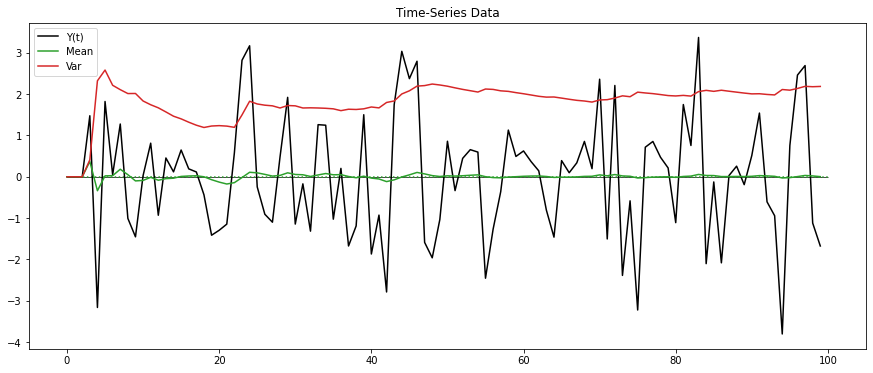

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


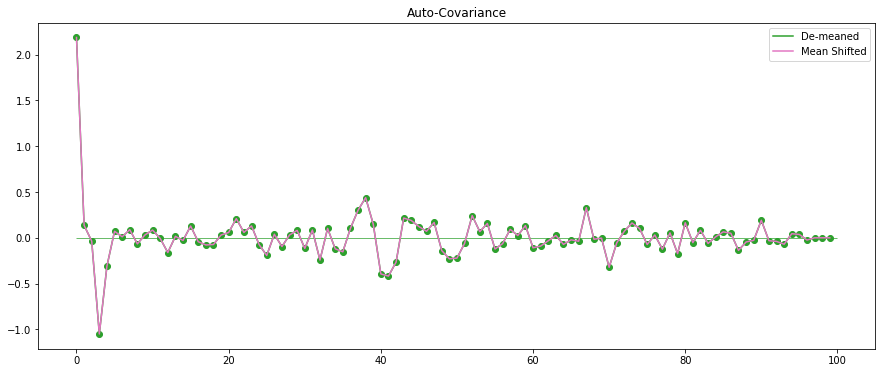

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


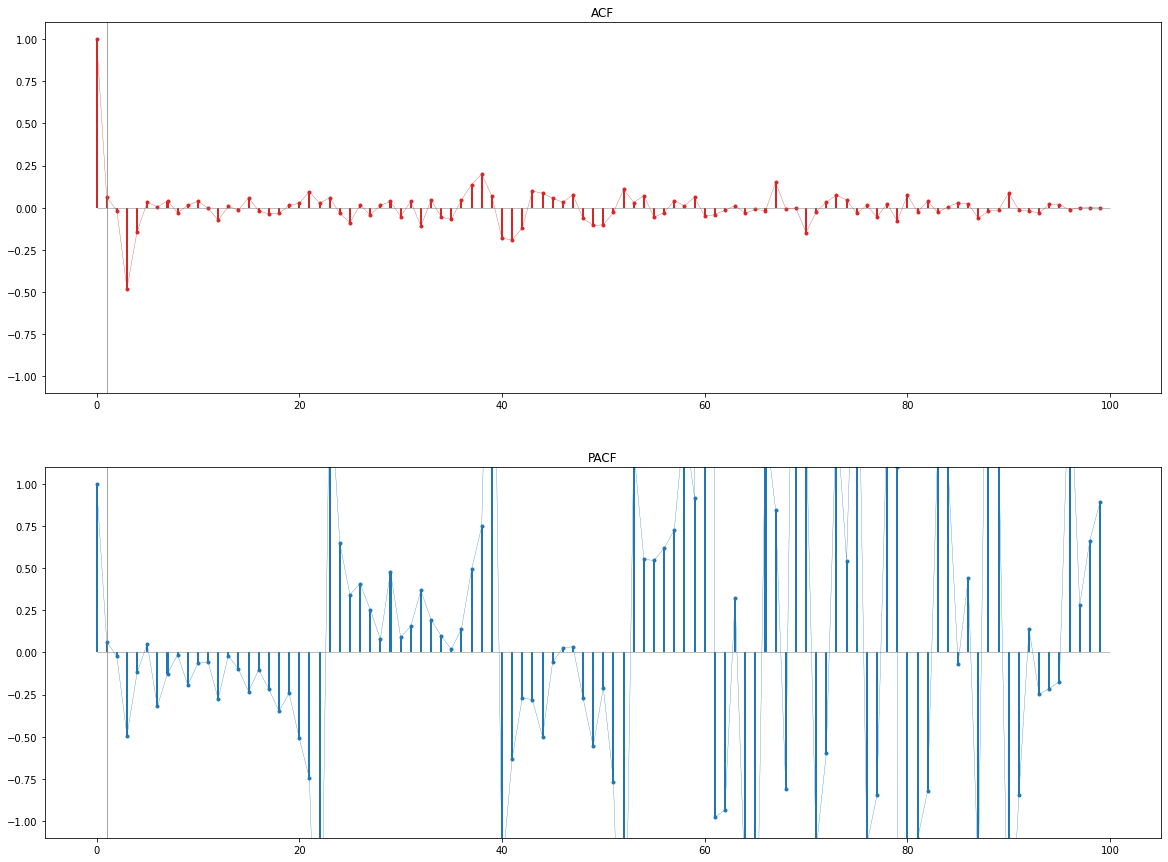

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is False
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
def fYt (Y,e,t):
  return e[t] - e[t-3]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(fYt, tStep, 3, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)

print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

## (b)  Y[t] = Y[t-1] - 0.9*Y[t-2] + e[t]

**Ans: Series is Stationary**

Mean of Data: -0.1736591501228563


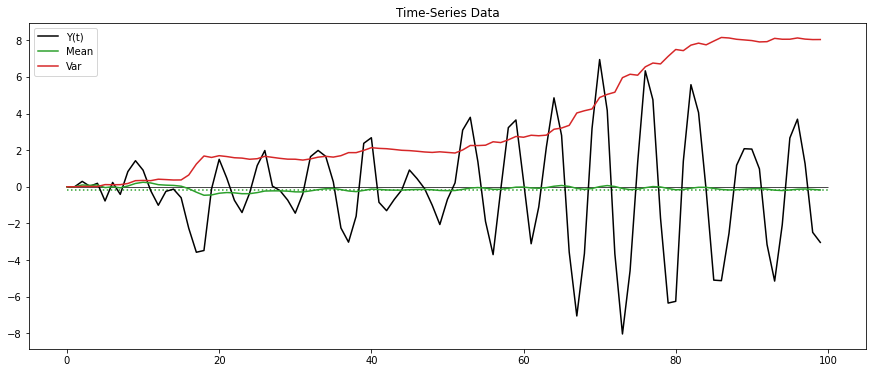

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


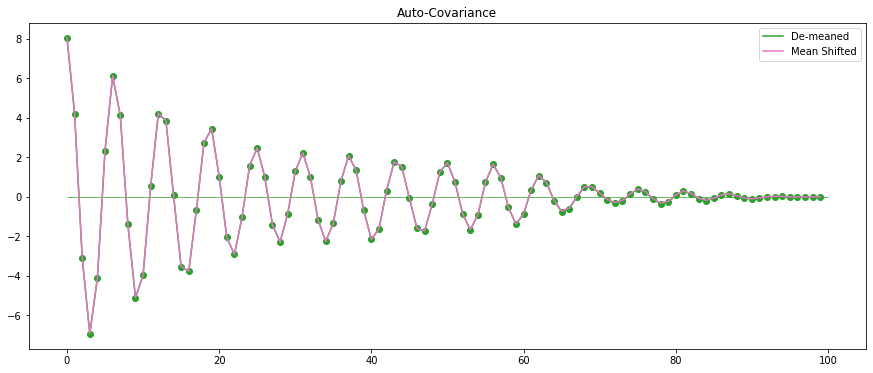

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


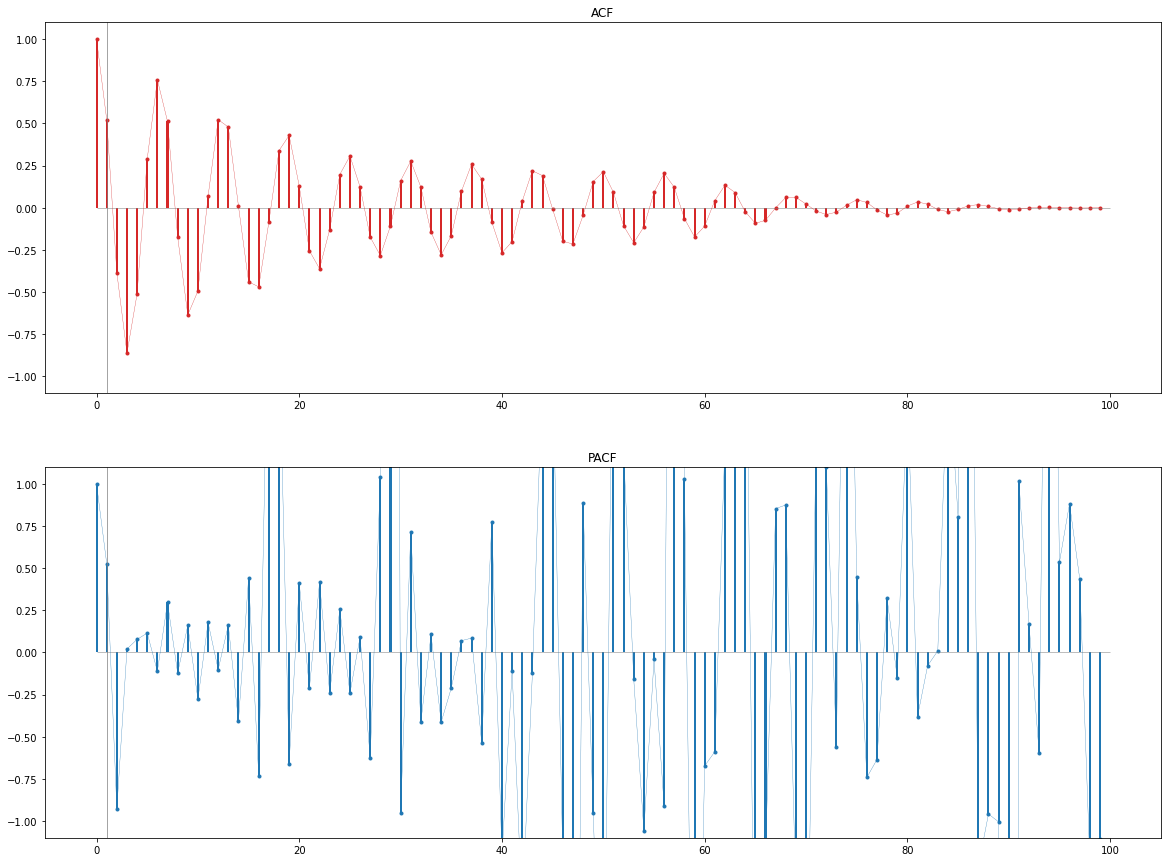

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is False
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
def fYt (Y,e,t):
  return Y[t-1] - 0.9*Y[t-2] + e[t]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_  = GenTS(fYt, tStep, 2, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

## (c) Y[t] = 0.7*Y[t-1] + 0.2*Y[t-2] - 0.1*Y[t-3] - 0.3*Y[t-4] + e[t]


**Ans: Series is Stationary**

Mean of Data: -0.10007499367150334


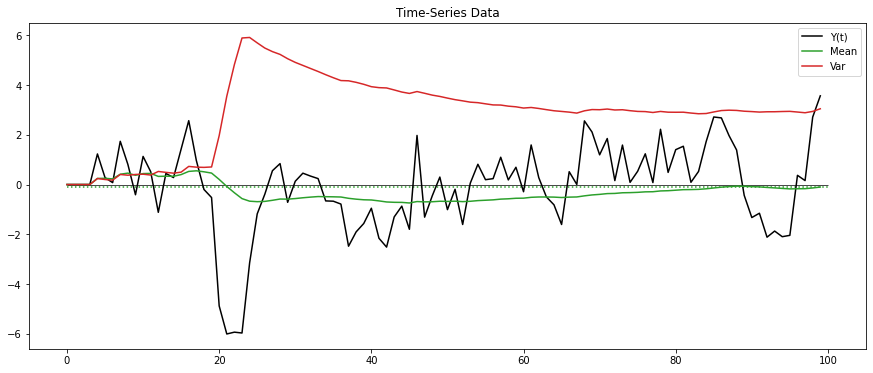

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


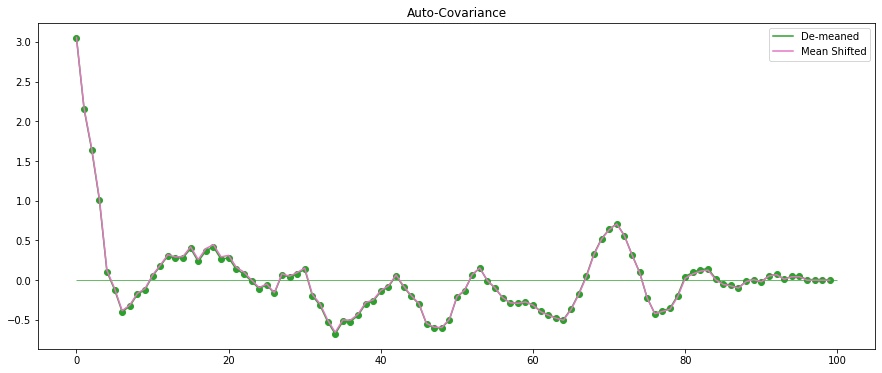

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


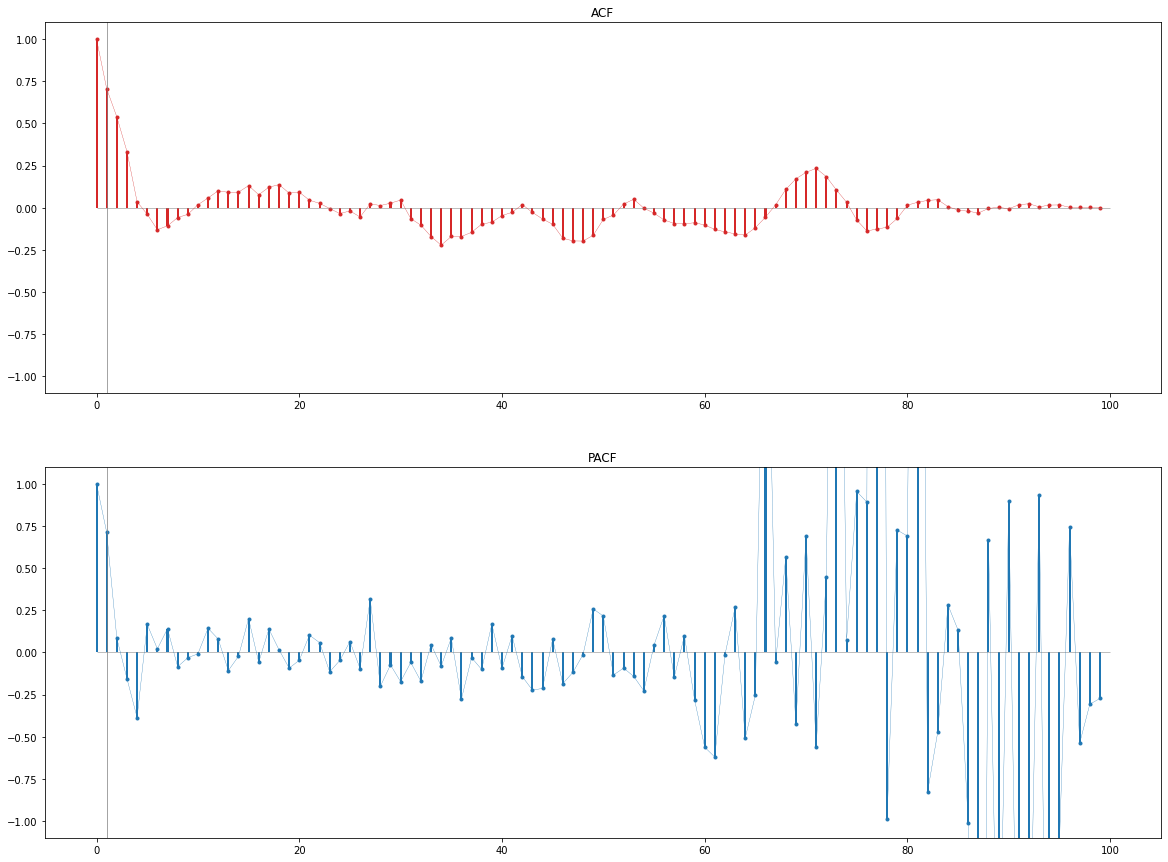

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is False
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
def fYt (Y,e,t):
  return 0.7*Y[t-1] + 0.2*Y[t-2] - 0.1*Y[t-3] - 0.3*Y[t-4] + e[t]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(fYt, tStep, 4, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

##(d) Y[t] = t + e[t]

**Ans: Series is Non-Stationary**

Mean of Data: 49.38680584510292


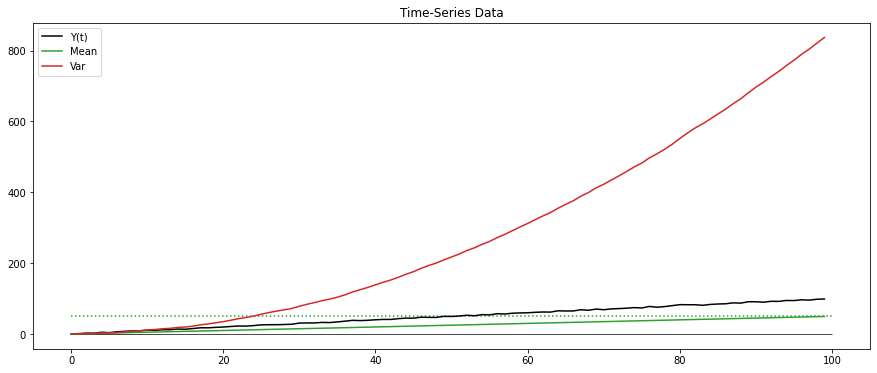

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


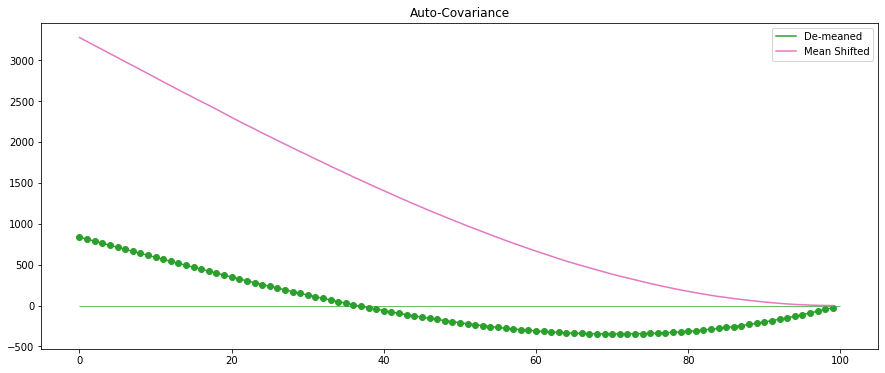

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


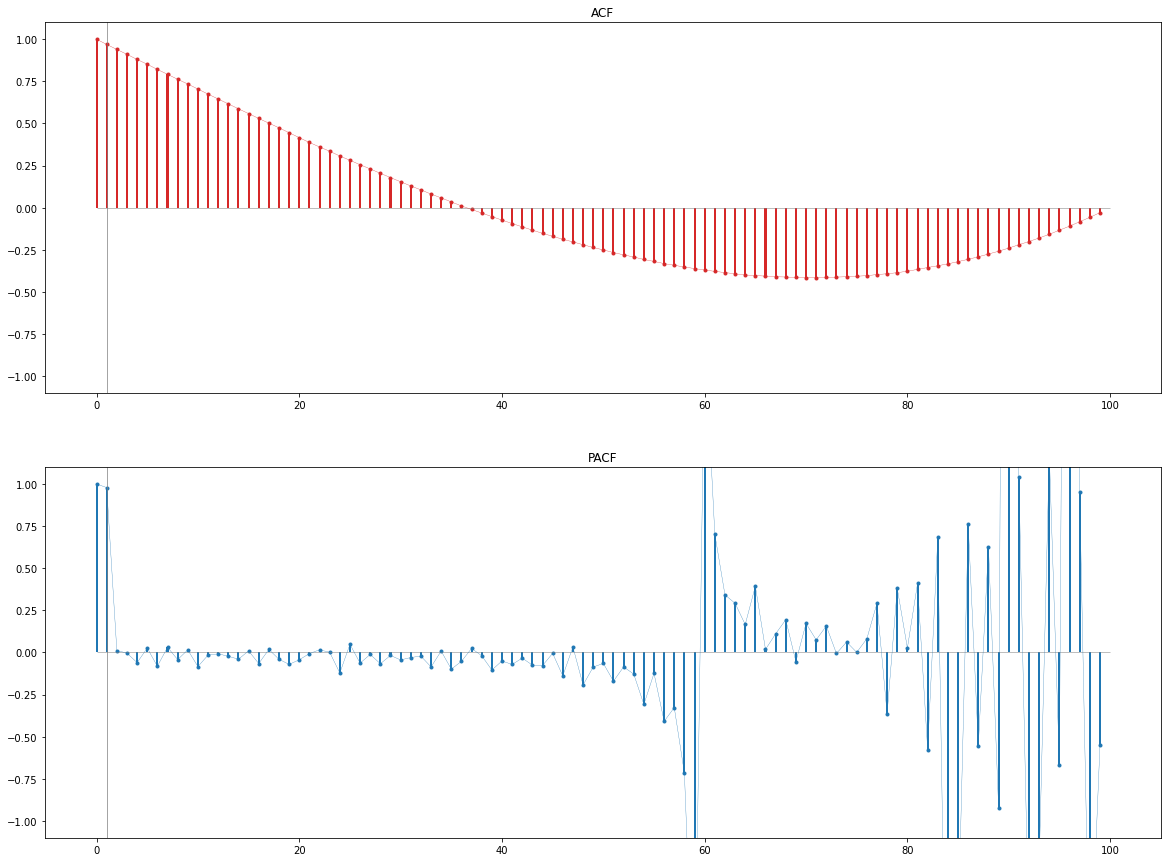

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is True
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
def fYt (Y,e,t):
  return  t + e[t]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(fYt, tStep, 1, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

##(e) Y[t] = e[t]

**Ans: Series is Stationary**

Mean of Data: 0.0582124424090287


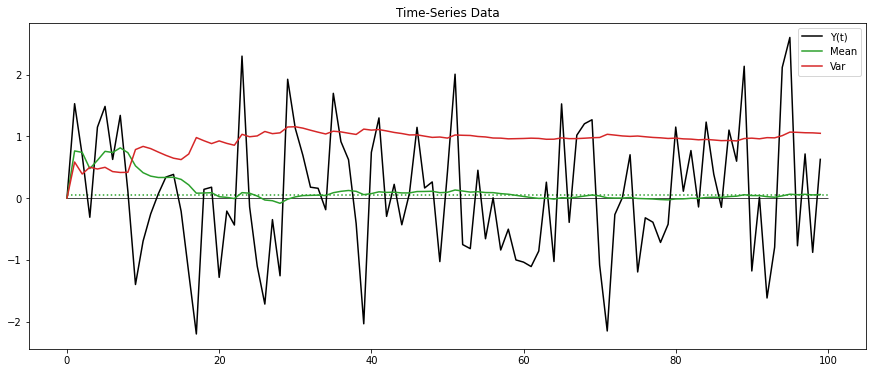

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


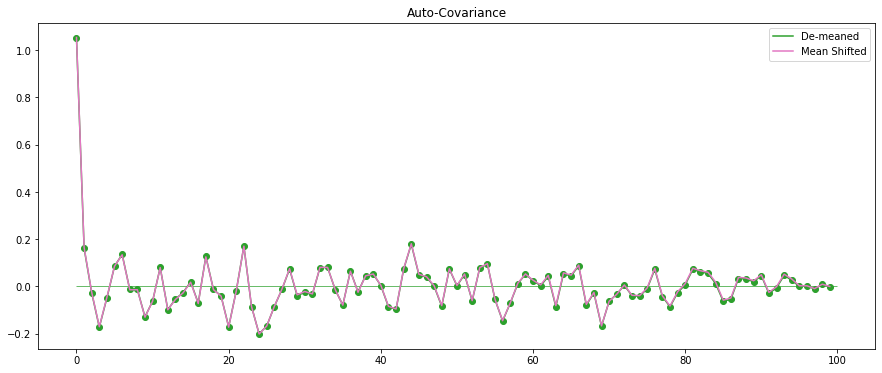

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


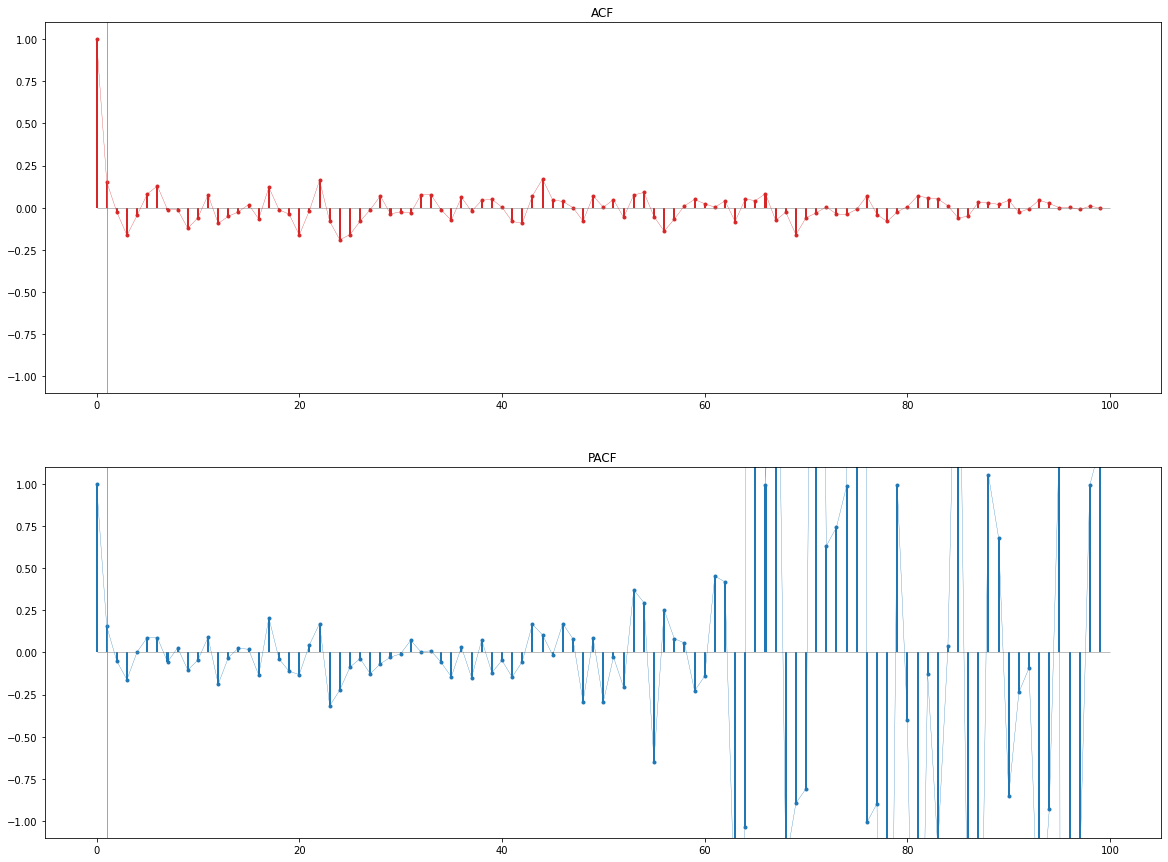

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is False
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
def fYt (Y,e,t):
  return  e[t]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(fYt, tStep, 1, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

##(f) Y[t] = e[t]*e[t-2]

**Ans: Series is Stationary**

Mean of Data: -0.06578303338078863


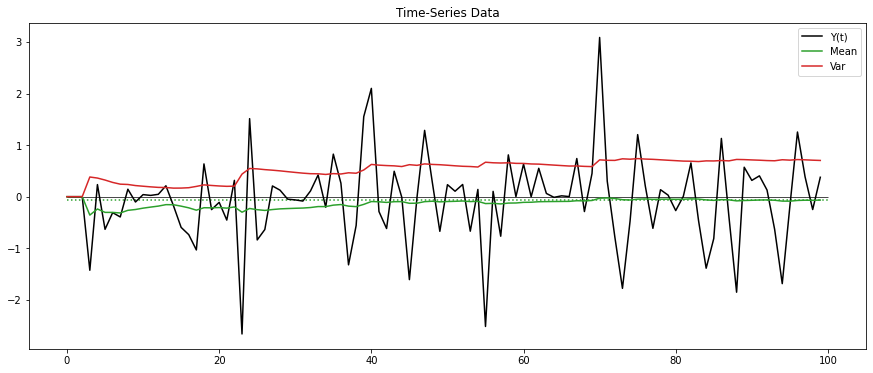

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


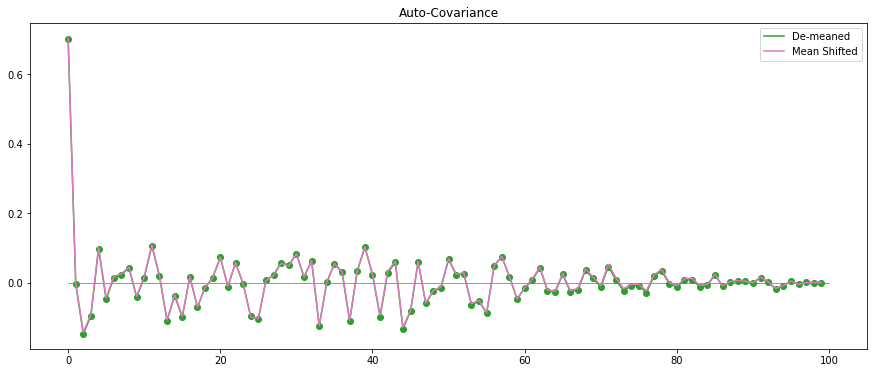

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


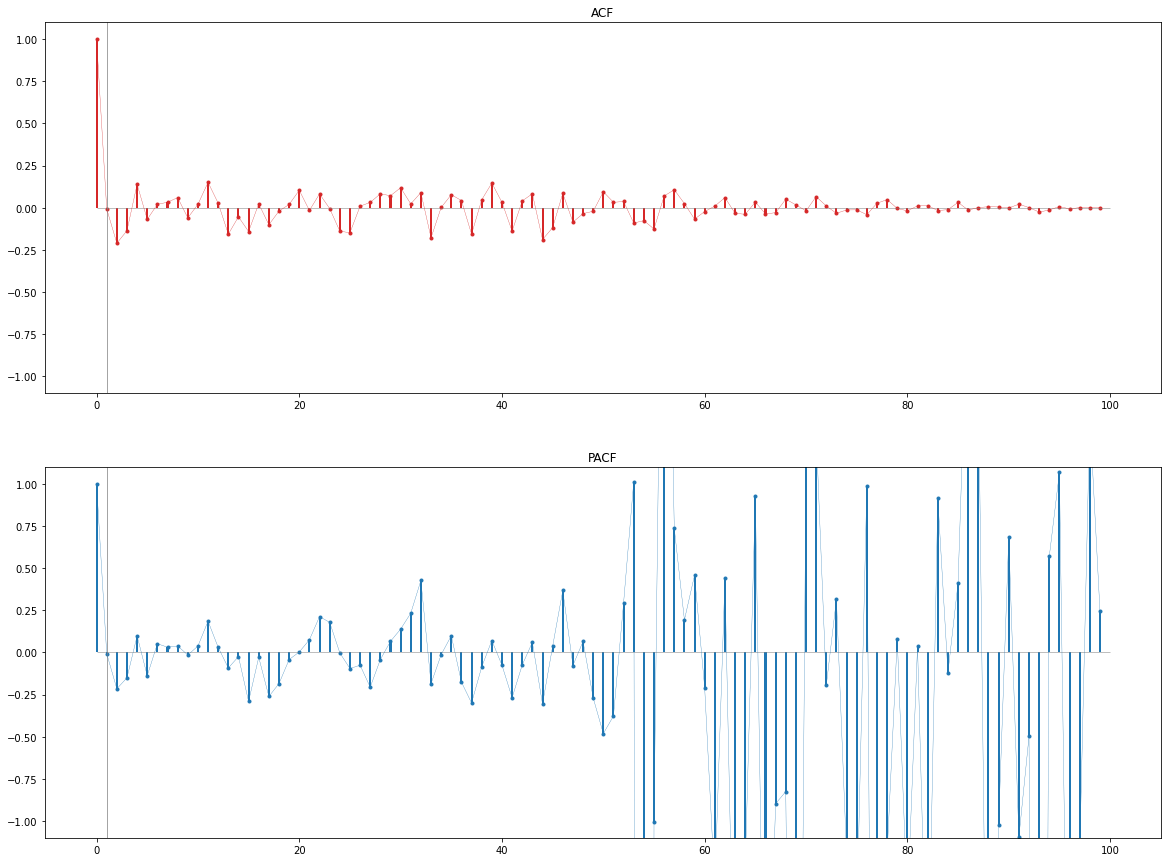

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is False
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
def fYt (Y,e,t):
  return  e[t]*e[t-2]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_  = GenTS(fYt, tStep, 2, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

**END OF SOLUTION**

---



# ARCHIVE CODE


## Custom

Mean of Data: 1.498268828213887


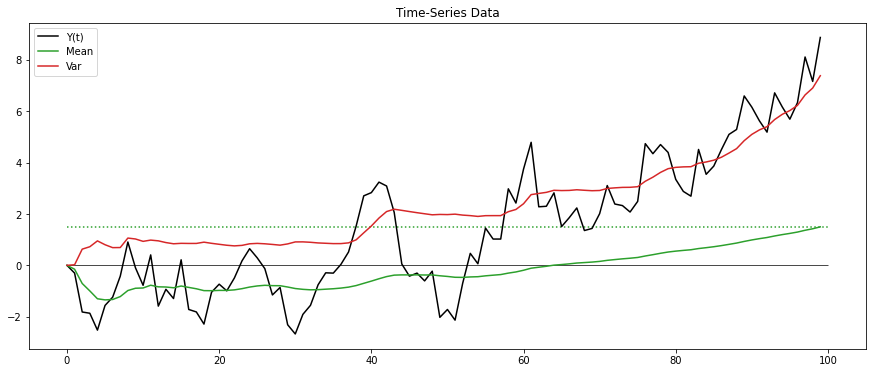

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


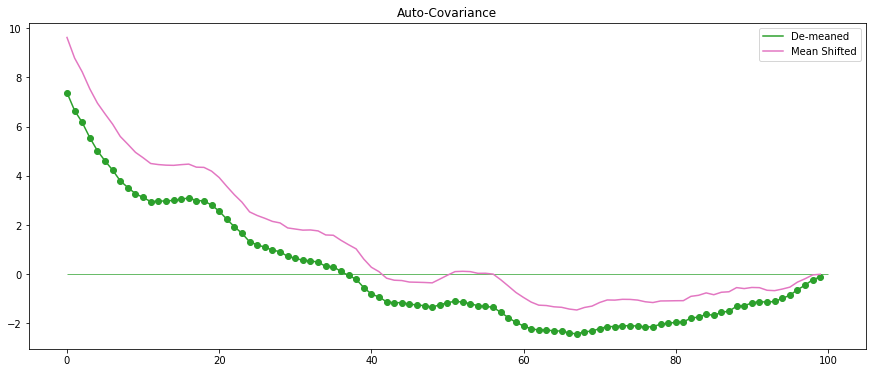

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


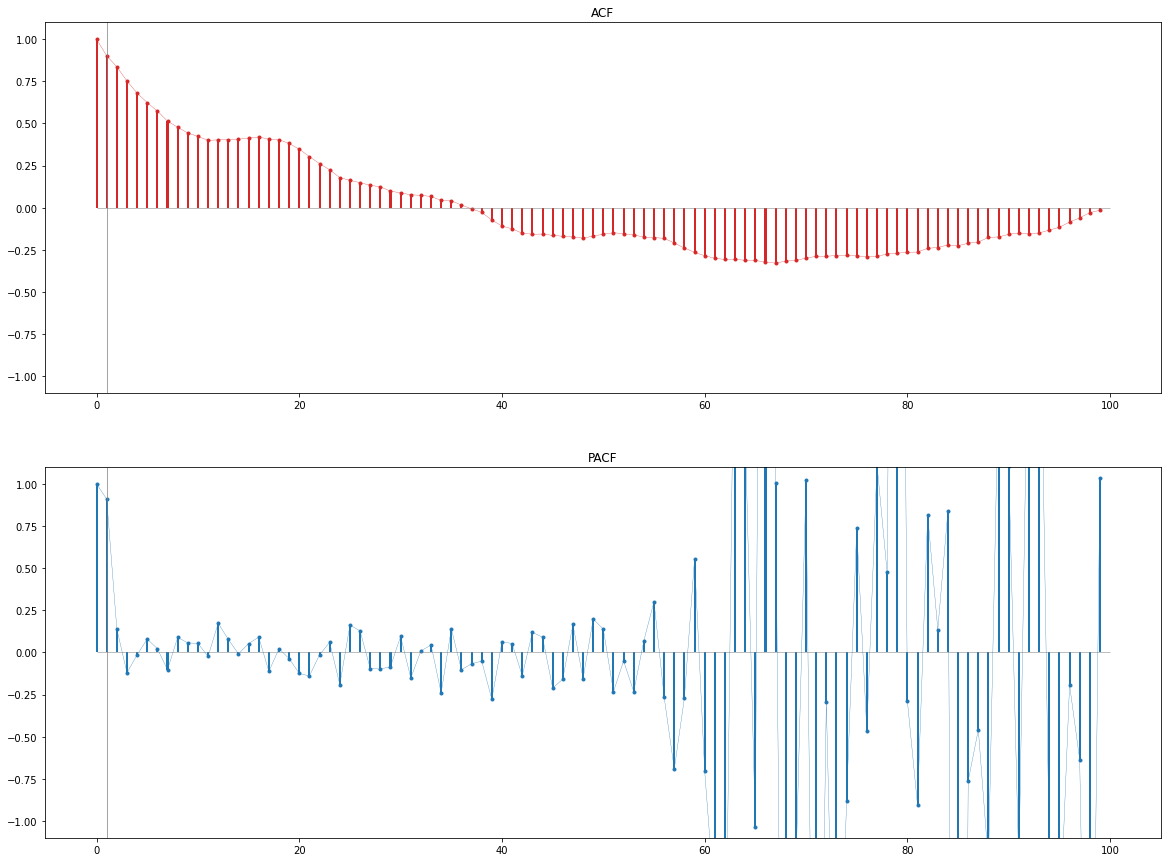

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is True
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:

def fYt (Y,e,t):
  return 1*Y[t-1] + e[t]

tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(fYt, tStep, 1, tStep-1, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')


## AR(n)

coefficients:phi:: [0.91648577 0.88024279 0.69903234]
Mean of Data: 874815310951.7389


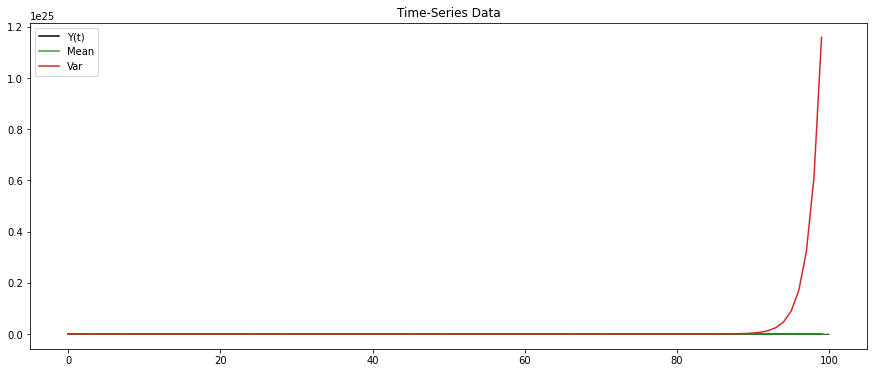

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


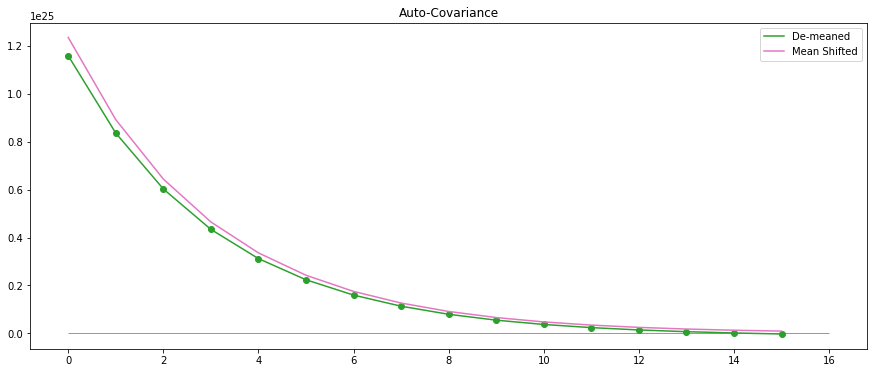

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


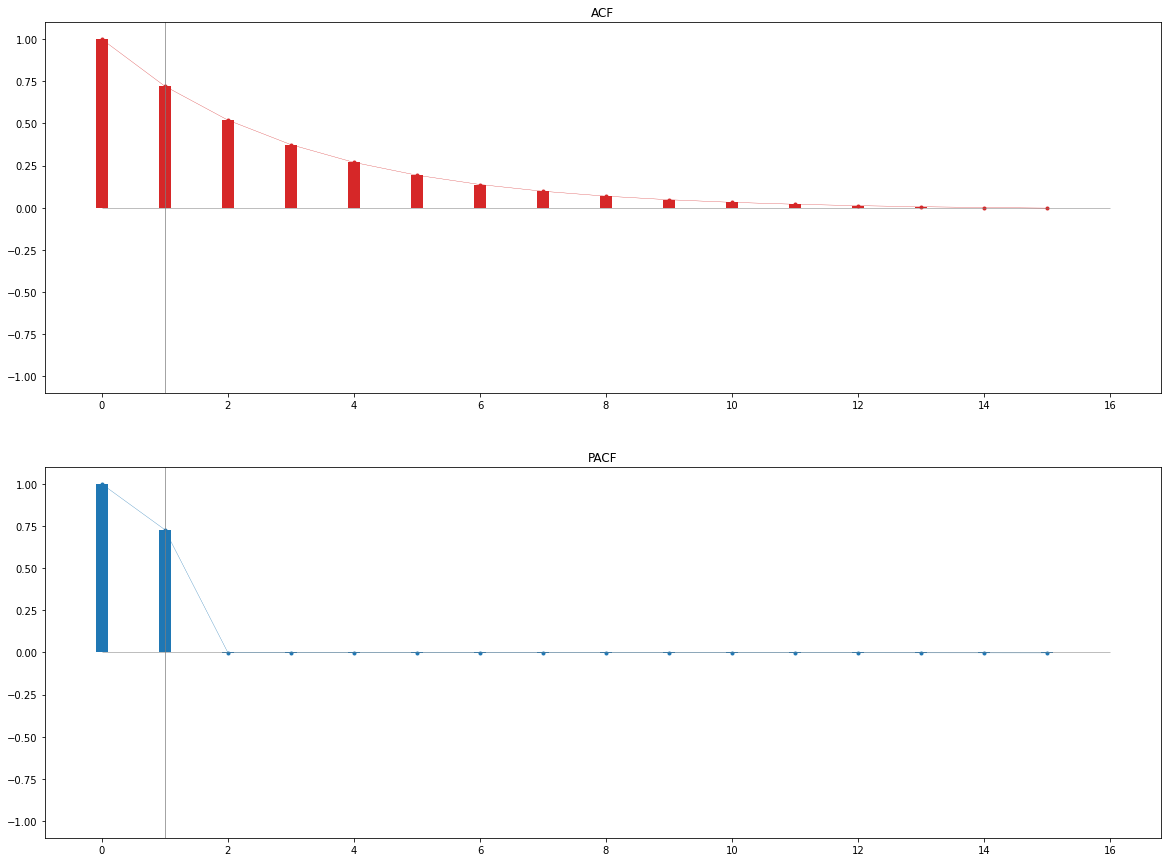

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is True
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
n=2
phi= np.random.rand(n+1)
print('coefficients:phi::',phi)


def AR_n(Y,e,t):
  res = e[t] + phi[0]
  for i in range(1,n+1):
    res += phi[i]*Y[t-i] 
  return res
        
tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE
# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(AR_n, tStep, 2,15, e)

tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

## MA(n)

coefficients:theta:: [0.14045168 0.24001063 0.68998442]
Mean of Data: 0.13000653520628666


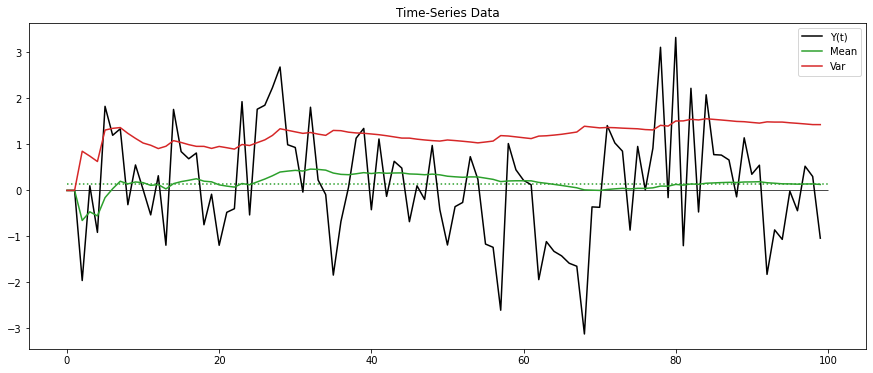

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


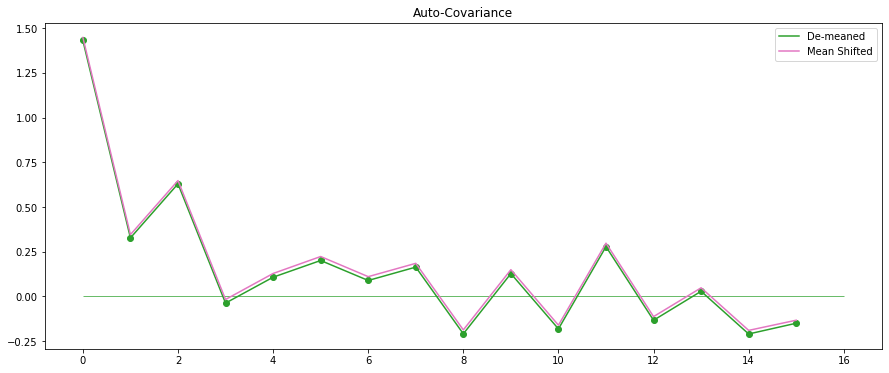

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


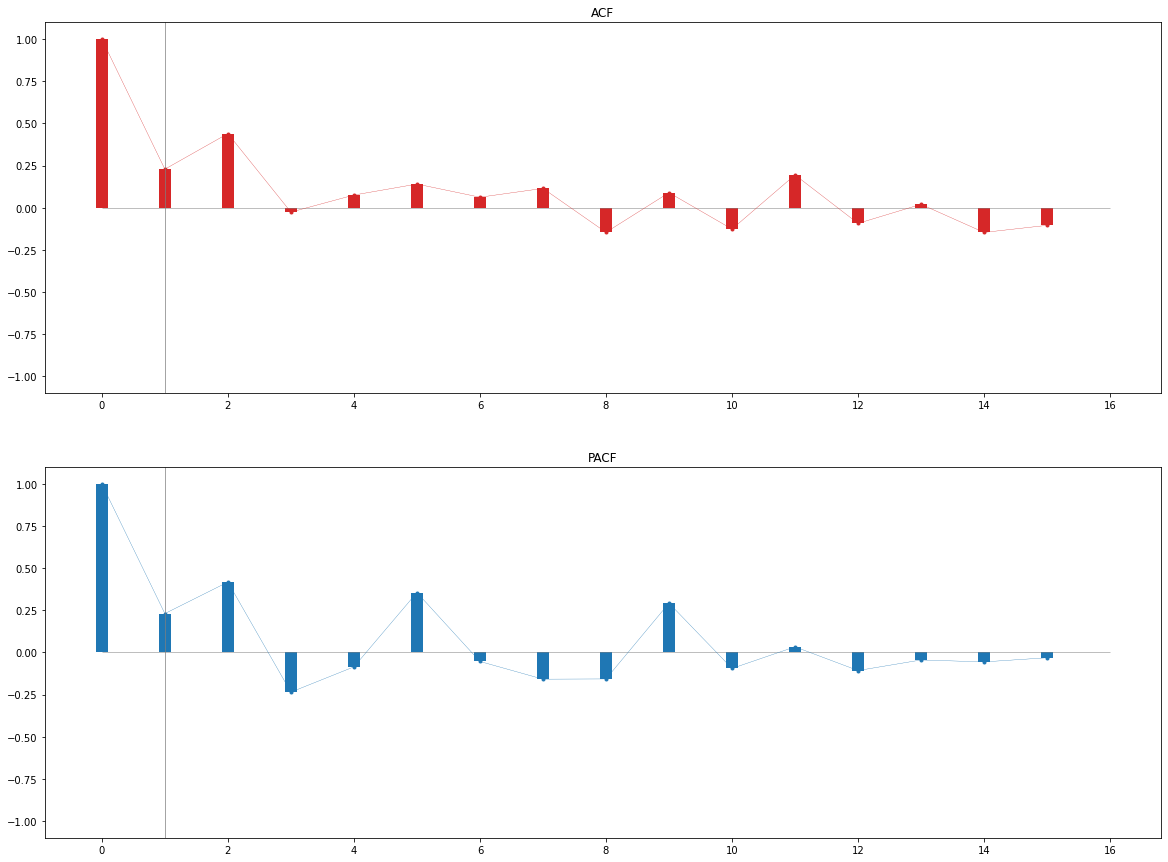

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ADF-Test Hypothesis :: Series is Non-Stationary
RESULT :: Hypothesis is True
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [ ]:
n=2
theta= np.random.rand(n+1)
print('coefficients:theta::',theta)

def MA_n(Y,e,t):
  res = e[t] + theta[0]
  for i in range(1,n+1):
    res += theta[i]*e[t-i] 
  return res



tStep = 100
e = np.random.normal(loc=0, scale=1, size=tStep) # <<--------------------- SET RANDOM NOISE HERE

# GenTS(fYt, nos_steps, start_step, Lags)
data,_,_ = GenTS(MA_n, tStep, 2, 15,e)
tRes, bRes, pRes = adf_test(data,0.05,details=False)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(tRes)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')